In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


COLAB 版本

In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  uploaded
import io
df = pd.read_csv(io.StringIO(uploaded['filter_Train_X.csv'].decode('utf-8')))
df


In [0]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
uploaded
import io
df2 = pd.read_csv(io.StringIO(uploaded['Train_Y.csv'].decode('utf-8')))


In [0]:
filename = './data/Train_Y.csv'
df = pd.read_csv(filename,encoding='cp950')

In [0]:
filename = 'filter_Train_X.csv'
df2 = pd.read_csv(filename,encoding='utf-8')

In [0]:
df.shape

(237, 2)

In [0]:
df2.shape

(237, 29)

#Visualize the closing price history

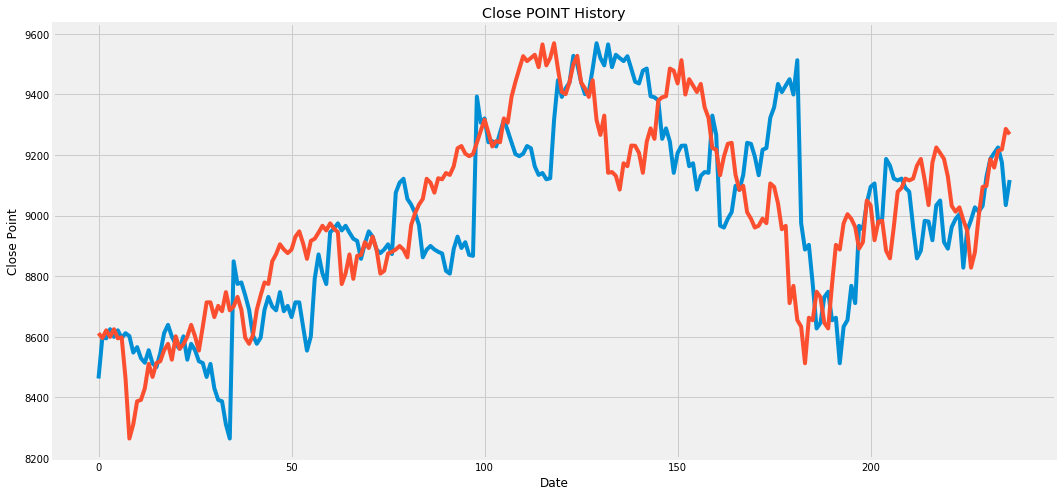

In [0]:
plt.figure(figsize=(16,8))
plt.title('Close POINT History')
plt.plot(df2['Close'])
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Point')
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

190

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [0]:

#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(180, 10, 1)

In [0]:
model = Sequential()
model.add(LSTM(128,activation='relu', input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(LSTM(64,activation='relu')) 
model.add(Dense(32))   
model.add(Dense(1,activation='sigmoid'))

In [0]:
#Compile the model
model.compile(optimizer='Nadam', loss='MSE',metrics=['mae', 'acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 128)           66560     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 118,081
Trainable params: 118,081
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train the model
model.fit(x_train, y_train, batch_size=30, epochs=50)

In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 10: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:

#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

81.96856575126596

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


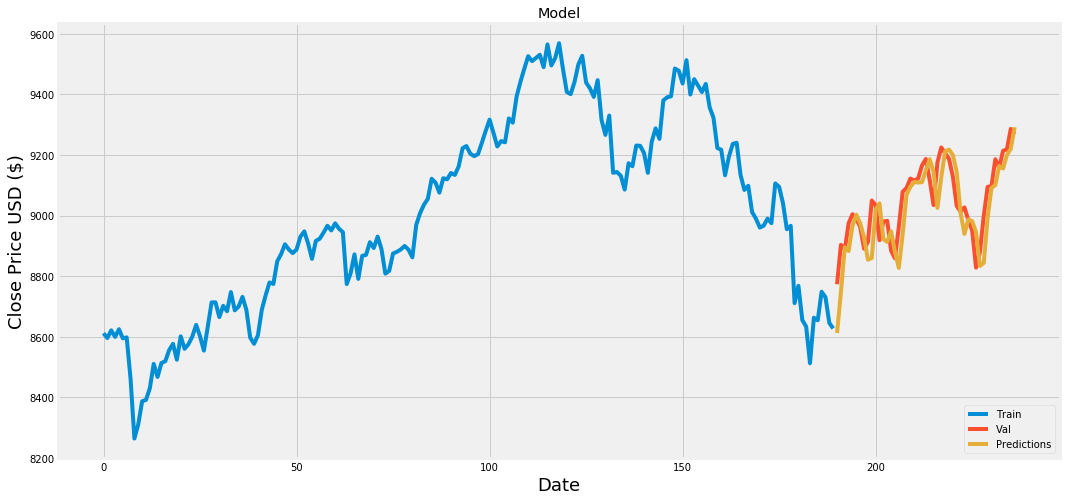

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
valid

,Close,Predictions
190,8773.55,8612.744141
191,8903.68,8746.599609
192,8888.07,8895.391602
193,8974.76,8883.156250
194,9004.86,8965.914062
195,8989.18,9003.143555
196,8962.60,8974.682617
197,8891.02,8928.123047
198,8912.62,8854.639648
199,9049.98,8859.996094


In [0]:
filename = 'filter_TEST_X.csv'
df = pd.read_csv(filename,encoding='utf-8')
#Get the quote
#Create a new dataframe
new_df = df.filter(['收盤價'])
#Get teh last 10 day closing price values and convert the dataframe to an array
last_10_days = new_df[-10:].values
#Scale the data to be values between 0 and 1
last_10_days_scaled = scaler.transform(last_10_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_10_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[8842.753]]


預測結果

In [0]:
pred_price/int(new_df.mean())

array([[0.96747845]], dtype=float32)